In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15,9

In [15]:
# df=pd.read_csv('conversocial_messages.csv',encoding='ISO-8859-1')

import glob,csv
import pandas as pd
df = pd.concat([pd.read_csv(f, encoding='latin1', quoting=csv.QUOTE_NONE,error_bad_lines=False) \
                for f in glob.glob('*.csv')])

In [16]:
len(df)

25121

In [17]:
df.columns

Index(['_1'], dtype='object')

In [18]:
df.head()

,_1
0,thousands of tweets attacking americansâ¦rt @...
1,i play with a different kind of balls ð@twe...
2,ð¤ el delantero no ha respondido aâ¦rt @sky...
3,watch england's opening test against new zeala...
4,notre 10Ã¨me numÃ©ro de parole de supporters e...


In [19]:
((df[~(df['_1'].str.contains('[A-Za-z]'))].count()[0])/df.count()[0])*100

5.776043947295092

In [20]:
# df.loc[df['conversocial_message.text'].str.contains('^#.*')]

In [21]:
# df=df[df['conversocial_message.text'].str.contains('[A-Za-z]', na=False)]  

In [22]:
# df=df[['conversocial_message.platform','conversocial_message.text','conversocial_message.create_date',\
#       'conversocial_message.message_type','conversocial_message.private','conversocial_message.channel_name',\
#       'conversocial_message.tag_name','conversocial_message.user_email']]

In [23]:
df.head()

,_1
0,thousands of tweets attacking americansâ¦rt @...
1,i play with a different kind of balls ð@twe...
2,ð¤ el delantero no ha respondido aâ¦rt @sky...
3,watch england's opening test against new zeala...
4,notre 10Ã¨me numÃ©ro de parole de supporters e...


In [24]:
df.columns,len(df.columns)

(Index(['_1'], dtype='object'), 1)

In [25]:
len(df)

25121

In [26]:
# for col in df.columns:
#     print(df[col].unique())

In [27]:
df.rename(columns={'_1':'tweet_txt'},inplace=True)

In [28]:
df.head()

,tweet_txt
0,thousands of tweets attacking americansâ¦rt @...
1,i play with a different kind of balls ð@twe...
2,ð¤ el delantero no ha respondido aâ¦rt @sky...
3,watch england's opening test against new zeala...
4,notre 10Ã¨me numÃ©ro de parole de supporters e...


In [29]:
# for col in df.columns:
#     if col not in ('text','create_date','tag_name'):
#         print(df[col].value_counts())
#         print("\n")

In [30]:
df.dtypes

tweet_txt    object
dtype: object

In [31]:
import re
def data_cleansing(corpus):
    letters_only = re.sub("[^a-zA-Z]", " ", corpus) 
    words = letters_only.lower().split()                            
    return( " ".join( words ))
df['tweet_txt'] = df['tweet_txt'].apply(lambda x:data_cleansing(x))

In [32]:
# !pip install textblob

In [33]:
from textblob import TextBlob
# TextBlob(str((t.text).encode('ascii', 'ignore')))

In [34]:
df['sentiment_value']=df.tweet_txt.apply(lambda x:TextBlob(str((x).encode('ascii', 'ignore'))).sentiment.polarity)

In [35]:
TextBlob(str(('hello hate').encode('ascii', 'ignore'))).sentiment.polarity

-0.8

In [36]:
df.dtypes

tweet_txt           object
sentiment_value    float64
dtype: object

In [37]:
df['sentiment_score']=np.where(df.sentiment_value<=0.0,1,0)

In [38]:
df['sentiment_description']=np.where(df.sentiment_value<=0.0,'negative','positive')

In [39]:
df.head()

,tweet_txt,sentiment_value,sentiment_score,sentiment_description
0,thousands of tweets attacking americans rt sha...,0.219273,0,positive
1,i play with a different kind of balls tweetyfa...,-0.007403,1,negative
2,el delantero no ha respondido a rt skycricket ...,0.200000,0,positive
3,watch england s opening test against new zeala...,0.136364,0,positive
4,notre me num ro de parole de supporters est co...,0.138695,0,positive


In [40]:
print(df.sentiment_score.value_counts(),'\n\n',df.sentiment_description.value_counts())

1    14956
0    10165
Name: sentiment_score, dtype: int64 

 negative    14956
positive    10165
Name: sentiment_description, dtype: int64


In [51]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(source,stop):
    tmp = df[df['sentiment_description']==source]
    clean_text=[]
    for each in tmp['tweet_txt']:
        clean_text.append(each)
    clean_text = ' '.join(clean_text)
    if source == 'positive' :
        color='white'
    else:
        color='black'
    if (stop=="yes"):    
        wordcloud = WordCloud(background_color=color,
                          width=3500,
                          height=3000,stopwords = stopwords
                         ).generate(clean_text)
    else:
        wordcloud = WordCloud(background_color=color,
                          width=3500,
                          height=3000
                         ).generate(clean_text)
    print('==='*30)
    print('word cloud of '+source+' is plotted below')
    plt.figure(1,figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [55]:
stopwords.add('co')
stopwords.add('https')
stopwords.add('hey')
stopwords.add('hello')
stopwords.add('school')

word cloud of positive is plotted below


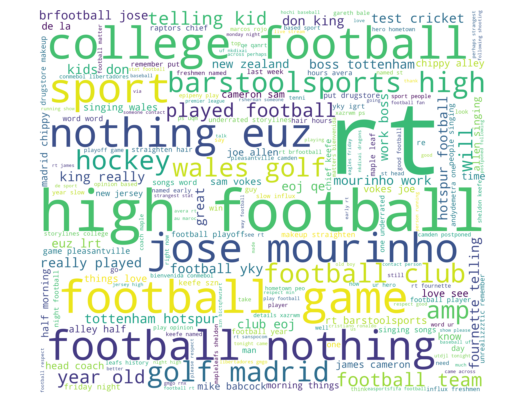

In [56]:
wordcloud('positive',"yes")

word cloud of negative is plotted below


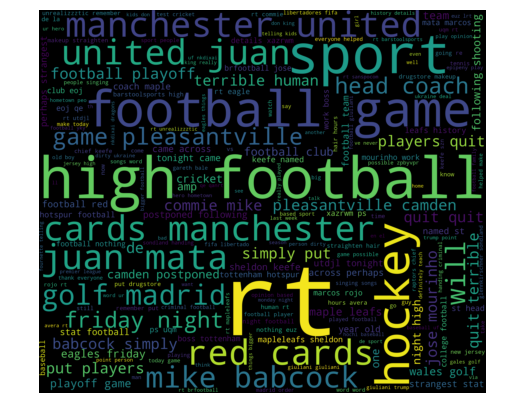

In [57]:
wordcloud('negative',"yes")

In [41]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.3)

In [108]:
df.head()

,tweet_txt,sentiment_value,sentiment_score,sentiment_description
0,he had a clear lane to the end zone instead he...,0.180000,0,positive
1,he had a clear lane to the end zone instead he...,0.072857,0,positive
2,formula mucho golf y buena carn denmark just w...,0.166667,0,positive
3,then cruyff took over changed the way football...,0.315000,0,positive
4,uppgifter city trappar upp jakten p https t co...,-0.250000,1,negative


In [109]:
train_corpus = []
test_corpus = []
for each in train['tweet_txt']:
    train_corpus.append(each)
for each in test['tweet_txt']:
    test_corpus.append(each)
## Start creating them
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english',strip_accents='unicode',
                                    token_pattern=r'\w{2,}')
train_features = v.fit_transform(train_corpus)
test_features=v.transform(test_corpus)

In [110]:
print(train_features.shape)
print(test_features.shape)

(1814, 14755)
(778, 14755)


In [111]:
v.get_feature_names()

['aa',
 'aaarod',
 'aacy',
 'aaeemuy',
 'aagulla',
 'aahmad',
 'aalac',
 'aan',
 'aaolcrcfl',
 'aaronwilson',
 'aaspgmg',
 'aatfcomadvocacy',
 'aatfrench',
 'ab',
 'abaixo',
 'abandoned',
 'abar',
 'abbey',
 'abbott',
 'abbyhoffmann',
 'abc',
 'abcgrandstand',
 'abcnetwork',
 'abcperth',
 'abdulqadirary',
 'aber',
 'ability',
 'abk',
 'able',
 'abo',
 'abominable',
 'abonn',
 'aboutrt',
 'abram',
 'abreu',
 'abria',
 'absent',
 'absolument',
 'absolute',
 'absolutely',
 'absqstcjxaau',
 'absqstcjxart',
 'absurd',
 'absycja',
 'abuja',
 'abuse',
 'abused',
 'ac',
 'acabado',
 'acad',
 'academic',
 'academy',
 'acaseofthegolf',
 'acc',
 'acca',
 'accas',
 'acce',
 'accelerat',
 'accept',
 'accepted',
 'access',
 'accessibility',
 'accident',
 'acciones',
 'accomplished',
 'accomplishments',
 'accord',
 'accordi',
 'according',
 'accountability',
 'accounted',
 'accounts',
 'accumulator',
 'accurate',
 'accusa',
 'accused',
 'aceitando',
 'aceptamos',
 'aces',
 'acffiorentina',
 'acgators

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [113]:
Classifiers = {'lg':LogisticRegression(random_state=42,C=5,max_iter=200),\
               'dt':DecisionTreeClassifier(random_state=42,min_samples_leaf=1),\
               'rf':RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1),\
               'gb':GradientBoostingClassifier(random_state=42,n_estimators=100,learning_rate=0.3)}

In [114]:
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(train_features,train['sentiment_description'])
    pred = clf.predict(test_features)
    Accuracy = accuracy_score(test['sentiment_description'],pred)
    Confusion_matrix = confusion_matrix(test['sentiment_description'],pred)
    print('==='*35)
    print('Accuracy of '+ clf_name +' is '+str(Accuracy))
    print('==='*35)
    print(Confusion_matrix)

In [115]:
ML_Pipeline('lg')

Accuracy of lg is 0.8393316195372751
[[415  86]
 [ 39 238]]


/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [116]:
# ML_Pipeline('dt')

In [117]:
# ML_Pipeline('rf')

In [118]:
# ML_Pipeline('gb')

In [119]:
test_corpus

['https t co lqt xvdznzrt breenewsome again the white ownership of the nfl cut a deal w jay z to perform this exact function to act as the token minority spo enfin une bonne itv sur le racismeat least one university of nebraska is going to a bowl congratulations lopers rt tommydoc',
 'rt jamierodr bravo this is one of my favorite videos while the national anthem was playing a young man continued to wear his basebal why people would ever wear heels booties in the airport is beyond me catch me in my tennis shoes and my blanket being as comfy as can be hey tonykhan look who s available bryanbroaddus what s are your thoughts about the northeast florida area great golf',
 'esp',
 'sunday dec pm',
 'https t co bzgrhmd fn ncaa return to the video game world and bring back ncaa football with easportsrt sportsmemnet we hope that our new short film with former professional football steve elliott inspires you https t co r pe wtgj',
 'a fa https t co uuvu gvexrt gffn celtic striker odsonne douard 

In [120]:
train['sentiment_description']

14     positive
36     positive
26     positive
7      negative
75     positive
31     negative
40     negative
73     positive
27     negative
84     negative
9      negative
60     negative
48     negative
41     negative
104    positive
6      positive
7      negative
89     positive
26     negative
1      positive
45     negative
20     negative
14     positive
40     negative
61     positive
2      negative
12     positive
24     negative
63     negative
1      positive
         ...   
31     positive
40     negative
19     positive
24     negative
43     negative
14     positive
17     negative
73     negative
66     positive
13     negative
18     positive
7      negative
34     positive
42     positive
42     negative
34     positive
101    negative
14     negative
52     positive
10     negative
18     negative
20     negative
23     positive
41     negative
39     positive
5      positive
38     positive
21     positive
1      positive
32     positive
Name: sentiment_descript

In [121]:
clf = RandomForestClassifier(random_state=42,n_estimators=100,n_jobs=-1)
fit = clf.fit(train_features,train['sentiment_description'])

In [122]:
words = v.get_feature_names()
importance = clf.feature_importances_
impordf = pd.DataFrame({'Word' : words,'Importance' : importance})
impordf = impordf.sort_values(['Importance', 'Word'], ascending=[0, 1])
impordf.head(20)

,Word,Importance
4572,football,0.027384
11069,rt,0.025595
5819,https,0.021401
5149,good,0.017158
7389,live,0.012511
5418,hand,0.008793
3047,decided,0.008685
8651,new,0.008460
11109,running,0.008370
14067,win,0.007705


In [123]:
impordf.loc[impordf['Importance']<=0.0]

,Word,Importance
0,aa,0.0
1,aaarod,0.0
5,aahmad,0.0
6,aalac,0.0
9,aaronwilson,0.0
10,aaspgmg,0.0
17,abbey,0.0
19,abbyhoffmann,0.0
22,abcnetwork,0.0
23,abcperth,0.0


In [124]:
clf = LogisticRegression(random_state=42,C=5,max_iter=200)
fit = clf.fit(train_features,train['sentiment_description'])
pred = clf.predict(test_features)
Accuracy = accuracy_score(test['sentiment_description'],pred)
Confusion_matrix = confusion_matrix(test['sentiment_description'],pred)
print('==='*35)
print('Accuracy of '+ 'lr' +' is '+str(Accuracy))
print('==='*35)
print(Confusion_matrix)

Accuracy of lr is 0.8393316195372751
[[415  86]
 [ 39 238]]


/Users/neerajpadarthi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
!pip install joblib

    100% |████████████████████████████████| 296kB 9.3MB/s eta 0:00:01


In [136]:
from joblib import dump,load
dump(fit,'lr.joblib')
dump(v,'tfid.joblib')

['tfid.joblib']

In [140]:
from joblib import dump,load
model=load('lr.joblib')
tfidf_temp=load('tfid.joblib')



In [141]:
a=["internet is very slow",
   "issue with billing",
   "nice service provided",
   "thanks problem resolved"
   ,"HeyFriends I found great iPhone 6S giveaway     you can get it here---> #iphone6Sgiveawy2k16     Check it out looks like great freebie.     Don't Drop This"
  ,"Unfortunately I will have to transfer my lines to a different provider.  I would like to ensure there won't be any issues when my new provider attempts to port my numbers to their service?"]
tdf=pd.Series(a).astype(str).apply(lambda x:data_cleansing(x))
t_a=tfidf_temp.transform(tdf)
pred1 = model.predict(t_a)

In [143]:
pred1

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'negative'], dtype=object)

In [145]:
type(tdf)

pandas.core.series.Series